In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
batch_size = 32

# Load data
print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=vocab_size)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

# Because the gods of machine learning demand tribute in the form of data preprocessing
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 28s 170ms/step - loss: 0.6037 - acc: 0.6654 - val_loss: 0.4550 - val_acc: 0.7988
Epoch 2/10
157/157 [==============================] - 25s 159ms/step - loss: 0.3952 - acc: 0.8367 - val_loss: 0.8944 - val_acc: 0.5944
Epoch 3/10
1

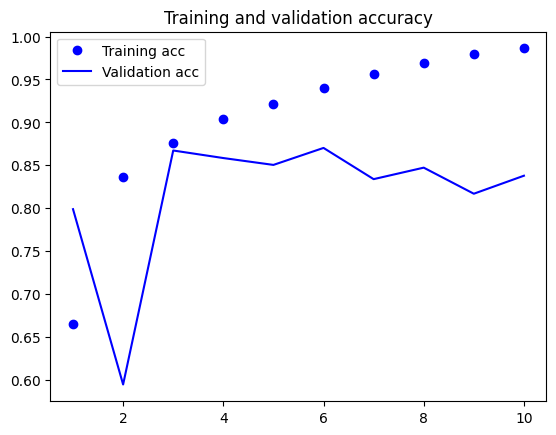

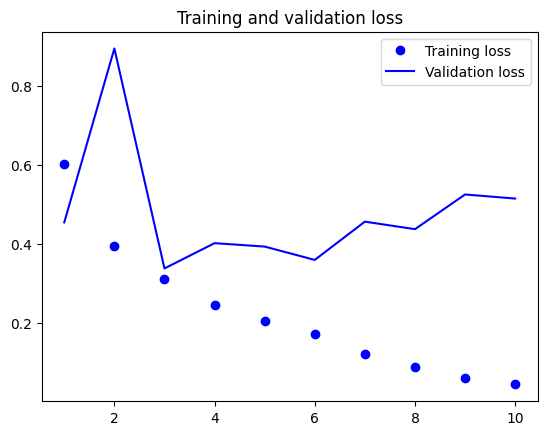

In [4]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of the fit method of your model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Loss plot
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [5]:
from tensorflow.keras.layers import LSTM

# LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

# Training the LSTM model
history_lstm = model_lstm.fit(input_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 61s 370ms/step - loss: 0.6053 - acc: 0.6543 - val_loss: 0.4711 - val_acc: 0.7638
Epoch 2/10
157/157 [==============================] - 56s 357ms/step - loss: 0.3745 - acc: 0.8450 - val_loss: 0.3936 - val_acc: 0.8320
Epoch 3/10
1

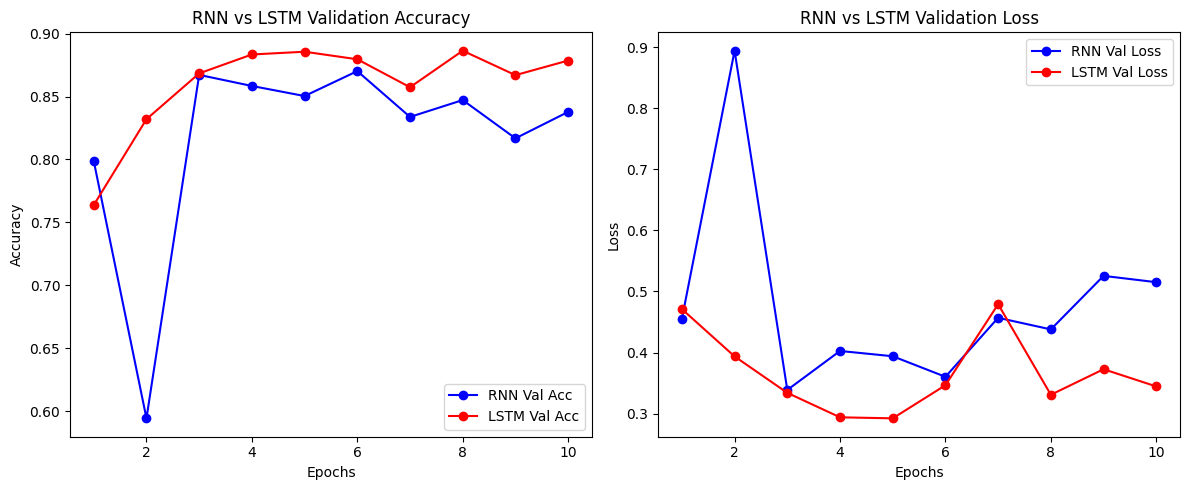

In [6]:
# Assuming 'history' is for your RNN model and 'history_lstm' is for your LSTM model
rnn_acc = history.history['val_acc']
lstm_acc = history_lstm.history['val_acc']
rnn_loss = history.history['val_loss']
lstm_loss = history_lstm.history['val_loss']
epochs = range(1, len(rnn_acc) + 1)

# Plotting validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = validation accuracy
plt.plot(epochs, rnn_acc, 'bo-', label='RNN Val Acc')
plt.plot(epochs, lstm_acc, 'ro-', label='LSTM Val Acc')
plt.title('RNN vs LSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = validation loss
plt.plot(epochs, rnn_loss, 'bo-', label='RNN Val Loss')
plt.plot(epochs, lstm_loss, 'ro-', label='LSTM Val Loss')
plt.title('RNN vs LSTM Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjusts plots to ensure there's no overlap
plt.show()


In [7]:
from tensorflow.keras.layers import GRU

# GRU model
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 32))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_gru.summary()

# Training the GRU model
history_gru = model_gru.fit(input_train, y_train,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 57s 343ms/step - loss: 0.6298 - acc: 0.6263 - val_loss: 0.5019 - val_acc: 0.7458
Epoch 2/10
157/157 [==============================] - 51s 325ms/step - loss: 0.3662 - acc: 0.8417 - val_loss: 0.3350 - val_acc: 0.8594
Epoch 3/10
1

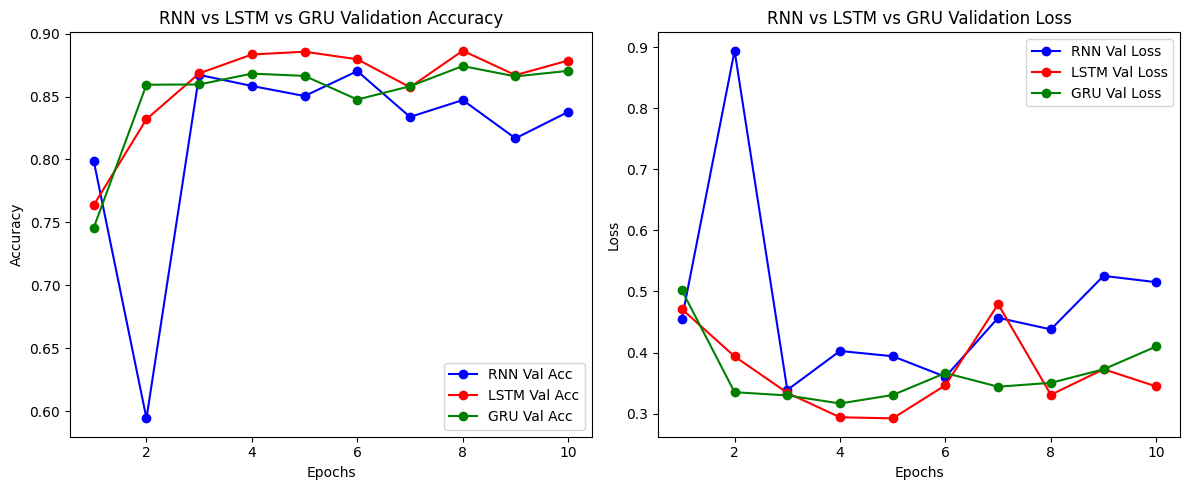

In [8]:
# Assuming 'history_gru' is the result of the fit method for your GRU model
gru_acc = history_gru.history['val_acc']
gru_loss = history_gru.history['val_loss']

# Plotting validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = validation accuracy
plt.plot(epochs, rnn_acc, 'bo-', label='RNN Val Acc')
plt.plot(epochs, lstm_acc, 'ro-', label='LSTM Val Acc')
plt.plot(epochs, gru_acc, 'go-', label='GRU Val Acc')
plt.title('RNN vs LSTM vs GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = validation loss
plt.plot(epochs, rnn_loss, 'bo-', label='RNN Val Loss')
plt.plot(epochs, lstm_loss, 'ro-', label='LSTM Val Loss')
plt.plot(epochs, gru_loss, 'go-', label='GRU Val Loss')
plt.title('RNN vs LSTM vs GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjusts plots to ensure there's no overlap
plt.show()


In [9]:
from tensorflow.keras.layers import GRU, Dropout

# Deep RNN model
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(vocab_size, 32))
model_deep_rnn.add(GRU(32, return_sequences=True))  # return_sequences=True is necessary for stacking
model_deep_rnn.add(GRU(32, return_sequences=True))
model_deep_rnn.add(GRU(32))  # Last layer should not return sequences
model_deep_rnn.add(Dense(1, activation='sigmoid'))

model_deep_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_deep_rnn.summary()

# Training the deep RNN model
history_deep_rnn = model_deep_rnn.fit(input_train, y_train,
                                      epochs=10,
                                      batch_size=128,
                                      validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru_1 (GRU)                 (None, None, 32)          6336      
                                                                 
 gru_2 (GRU)                 (None, None, 32)          6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 339041 (1.29 MB)
Trainable params: 339041 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157

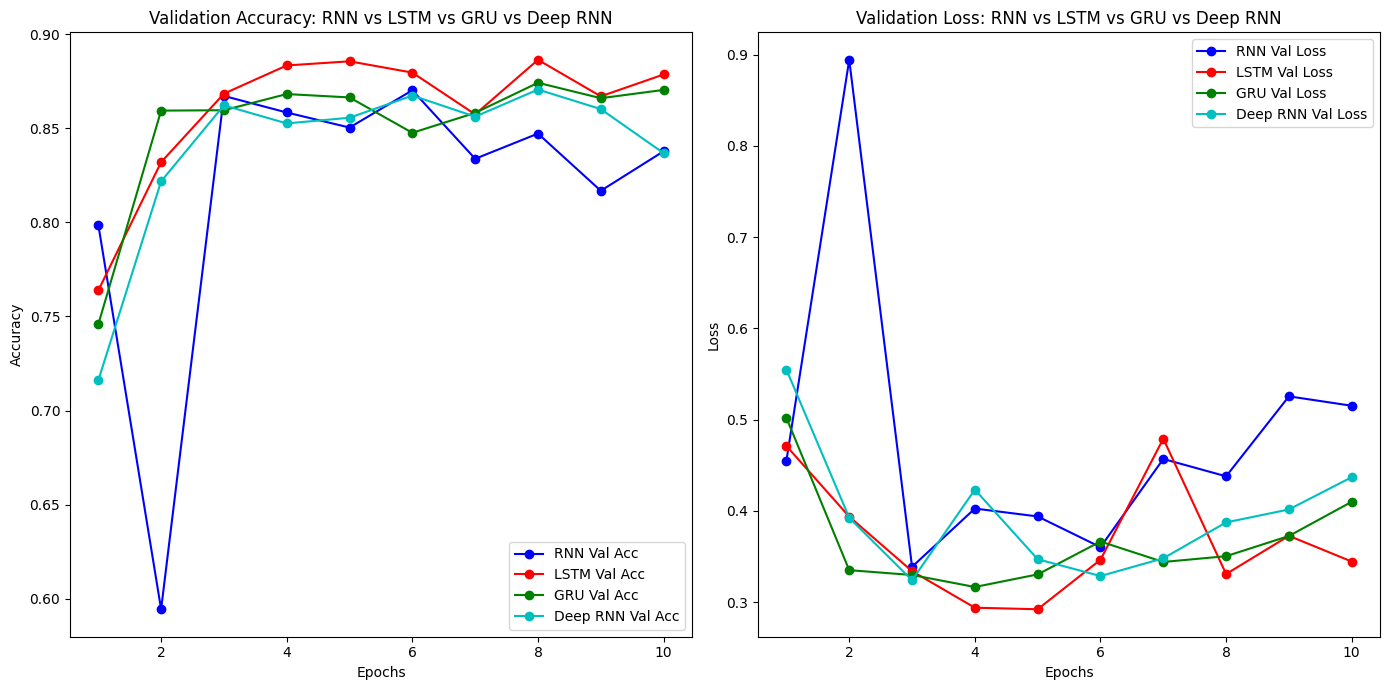

In [10]:
# Assume 'history_deep_rnn' is the history object from training the deep RNN model
deep_rnn_acc = history_deep_rnn.history['val_acc']
deep_rnn_loss = history_deep_rnn.history['val_loss']

# Plotting all models together
plt.figure(figsize=(14, 7))

# Plotting validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, rnn_acc, 'bo-', label='RNN Val Acc')
plt.plot(epochs, lstm_acc, 'ro-', label='LSTM Val Acc')
plt.plot(epochs, gru_acc, 'go-', label='GRU Val Acc')
plt.plot(epochs, deep_rnn_acc, 'co-', label='Deep RNN Val Acc')  # 'co-' for cyan color
plt.title('Validation Accuracy: RNN vs LSTM vs GRU vs Deep RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, rnn_loss, 'bo-', label='RNN Val Loss')
plt.plot(epochs, lstm_loss, 'ro-', label='LSTM Val Loss')
plt.plot(epochs, gru_loss, 'go-', label='GRU Val Loss')
plt.plot(epochs, deep_rnn_loss, 'co-', label='Deep RNN Val Loss')
plt.title('Validation Loss: RNN vs LSTM vs GRU vs Deep RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusions:


*   If you're looking for efficiency and performance, the GRU might be your go-to. It's like the compact car that gets great mileage and fits into tight parking spots.
*   The LSTM is like a reliable SUV – it'll get you there with comfort, but it might use a bit more fuel doing it.
*   The deep RNN could be overkill unless you're dealing with very complex sequences where deeper patterns need to be learned. It's like bringing a satellite to a street fight – impressive, but perhaps unnecessary.
*   The basic RNN is the old bicycle in the garage – it was fun to ride, but it might not get you up the hill on this track.


Ultimately, the choice of model depends on the specific requirements of your task, computational resources, and how much time you have for training. For most practical purposes, GRUs are efficient and effective, while LSTMs are great when you need that extra bit of memory power.